In [30]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import joblib

In [31]:
s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


from joblib import Memory
memory = Memory("cachedir")

@memory.cache
def calc_mesh(nx, mx):
    L = 2 * np.pi
    x_ = np.linspace(0, L, nx)
    x_fine = np.array(np.meshgrid(x_, x_))
    
    h = L / mx
    tmp = np.linspace(h, L, mx)
    x_m = np.array(np.meshgrid(tmp, tmp))

    h = 2 * np.pi / mx
    
    return x_fine, x_m, h
    

@memory.cache
def calc_coeffs(i, j, nx, mx):
    x_fine, x_m, h = calc_mesh(nx, mx)
    return s_n(x_fine[0] - x_m[0, i, j], h) * s_n(x_fine[1] - x_m[1, i, j], h)

In [40]:
s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))

def f_peri(coords):
    xx, yy = coords * 200.0 / 2 / np.pi
    pil = np.pi / 200.0
    return 0.5 + 0.01 * (
        np.cos(6 * pil * xx) * np.cos(8 * pil * yy) + (
            np.cos(8 * pil * xx) * np.cos(6 * pil * yy)
        )**2 + np.cos(2 * pil * xx - 10 * pil * yy) * np.cos(4 * pil * xx - 2 * pil * yy)
    )


def f_initial(coords):
    xx, yy = coords * 200.0 / 2 / np.pi
    return 0.5 + 0.01 * (
        np.cos(0.105 * xx) * np.cos(0.11 * yy) + (
            np.cos(0.13 * xx) * np.cos(0.087 * yy)
        )**2 + np.cos(0.025 * xx - 0.15 * yy) * np.cos(0.07 * xx - 0.02 * yy)
    )

def interpolate(v_m, nx, mx):
    sum_ = 0.0
    for i in range(v_m.shape[0]):
        for j in range(v_m.shape[1]):
            sum_ += v_m[i, j] * calc_coeffs(i, j, nx, mx)
    
    return sum_

def calc_norm(x1, x2, dx):
    return np.sum((x1[1:, 1:] - x2[1:, 1:])**2) * dx**2

def calc_interpolate_norm(mx, func):
    x_fine, x_coarse, h = calc_mesh(nx, mx)
    v_m = func(x_coarse)
    pp = interpolate(v_m, nx, mx)
    dx = x_fine[0, 0, 1] - x_fine[0, 0, 0]
    return calc_norm(pp, func(x_fine), dx) 

In [50]:
arr = np.arange(100).reshape(10, 10)

In [53]:
np.split(arr, 5, 5)

IndexError: tuple index out of range

In [26]:
nx = 1000
mx = 10

x_fine, x_m, h = calc_mesh(nx, mx)

v_m = f_peri(x_m)

In [27]:
pp_slow = p2_slow(v_m, nx, mx)

In [29]:
%%timeit
pp_slow = p2_slow(v_m, nx, mx)

254 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


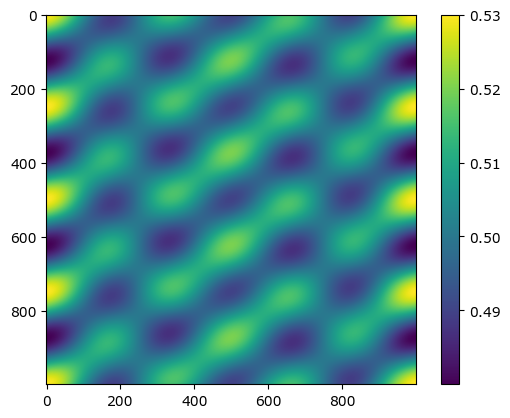

In [28]:
plt.imshow(pp_slow)
plt.colorbar()

In [46]:
mxs = np.arange(1, 10) * 8

mse = [calc_interpolate_norm(mx, f_initial) for mx in mxs]

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 45, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 46, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 47, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_co

/tmp/nix-shell.ybpKzJ/ipykernel_207780/1239453946.py:1: RuntimeWarning: invalid value encountered in divide
  s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 0, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 1, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 2, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Call

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 32, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 0, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Ca

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 32, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 0, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Ca

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 32, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 0, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Ca

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 32, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 0, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Ca

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 32, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 29, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 30, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 31, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 61, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 62, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 63, 1000, 64)
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] C

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(0, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(0, 18, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(0, 34, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(0, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(0, 51, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(0, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(0, 68, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(0, 69, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(1, 14, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(1, 15, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(1, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(1, 32, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(1, 49, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(1, 50, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(1, 66, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(1, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(2, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(2, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(2, 28, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(2, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(2, 46, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(2, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(2, 63, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(2, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(3, 8, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-s

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(3, 24, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(3, 25, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(3, 41, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(3, 42, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(3, 59, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(3, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(4, 4, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(4, 5, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_____

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(4, 21, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(4, 22, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(4, 39, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(4, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(4, 56, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(4, 57, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(5, 1, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(5, 2, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_____

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(5, 19, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(5, 20, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(5, 36, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(5, 37, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(5, 54, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(5, 55, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(5, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(6, 0, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
____

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(6, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(6, 18, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(6, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(6, 36, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(6, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(6, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(6, 69, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(6, 70, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(7, 15, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(7, 16, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(7, 32, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(7, 33, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(7, 49, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(7, 50, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(7, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(7, 68, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(8, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(8, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(8, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(8, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(8, 46, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(8, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(8, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(8, 65, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(9, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(9, 10, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(9, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(9, 27, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(9, 43, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(9, 44, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(9, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(9, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 4, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 5, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 21, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 22, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 39, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 55, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 56, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 70, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(10, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(11, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(11, 18, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(11, 34, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(11, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(11, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(11, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(11, 69, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(11, 70, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(12, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(12, 14, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(12, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(12, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(12, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(12, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(12, 65, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(12, 66, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(13, 11, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(13, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(13, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(13, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(13, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(13, 65, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(13, 66, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(14, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(14, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(14, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(14, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(14, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(14, 49, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(14, 66, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(14, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(15, 10, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(15, 11, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(15, 28, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(15, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(15, 44, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(15, 45, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(15, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(15, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(16, 7, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(16, 22, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(16, 23, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(16, 39, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(16, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(16, 56, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(16, 57, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 0, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 1, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 16, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 36, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 51, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(17, 68, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(18, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(18, 14, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(18, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(18, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(18, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(18, 49, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(18, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(18, 65, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(19, 8, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(19, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(19, 25, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(19, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(19, 41, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(19, 42, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(19, 59, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(19, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 3, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 4, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 19, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 20, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 36, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(20, 68, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(21, 11, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(21, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(21, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(21, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(21, 45, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(21, 46, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(21, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(21, 62, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(22, 7, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(22, 8, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(22, 23, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(22, 24, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(22, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(22, 41, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(22, 58, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(22, 59, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(23, 2, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(23, 3, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(23, 18, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(23, 19, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(23, 36, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(23, 37, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(23, 55, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(23, 56, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(23, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(24, 0, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(24, 15, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(24, 16, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(24, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(24, 32, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(24, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(24, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(24, 63, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(24, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(25, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(25, 10, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
__

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(25, 27, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(25, 28, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(25, 45, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(25, 46, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(25, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(25, 62, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(26, 7, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(26, 8, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(26, 25, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(26, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(26, 42, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(26, 43, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(26, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(26, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(27, 5, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(27, 21, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(27, 22, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(27, 39, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(27, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(27, 57, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(27, 58, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 1, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 2, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 18, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 36, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 37, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 70, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(28, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(29, 16, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(29, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(29, 34, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(29, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(29, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(29, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(29, 68, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(29, 69, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 45, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 46, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 62, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(30, 63, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 6, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 7, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 23, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 24, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 39, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 57, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(31, 58, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 1, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 2, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 19, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 20, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 37, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 38, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 54, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(32, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 0, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
__

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 15, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 16, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 32, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 65, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(33, 66, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 11, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 27, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 28, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 44, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 45, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 62, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(34, 63, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 25, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 41, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 42, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 59, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(35, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 3, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 4, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 20, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 21, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 37, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 38, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 54, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 70, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(36, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 15, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 16, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 32, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 63, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(37, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 10, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
__

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 27, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 44, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 45, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(38, 63, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 8, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 27, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 43, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 44, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 62, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(39, 63, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 6, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 7, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 22, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 23, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 41, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 56, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(40, 57, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 0, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 1, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 18, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 36, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 51, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(41, 68, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(42, 66, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 10, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 28, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 44, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 45, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(43, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 6, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 7, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 23, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 24, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 42, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 43, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(44, 62, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 8, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 24, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 25, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 39, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 55, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(45, 56, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 1, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 2, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 19, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 20, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 36, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 54, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(46, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 0, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
__

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 18, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 33, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 34, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 51, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(47, 68, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 14, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 32, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(48, 65, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 10, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 11, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 28, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 46, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 63, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(49, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 10, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 11, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 27, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 43, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 44, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(50, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 5, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 6, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 23, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 24, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 39, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 54, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 55, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 70, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(51, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 14, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 15, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 32, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 49, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 66, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(52, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 14, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 45, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 46, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(53, 62, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 6, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 7, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 24, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 25, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 42, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 43, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 58, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(54, 59, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 4, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 5, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 21, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 22, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 39, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 57, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(55, 58, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 3, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 4, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 19, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 20, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 38, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 39, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 54, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 55, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 70, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(56, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 16, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 34, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 51, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 68, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(57, 69, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 15, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 16, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 32, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 33, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 49, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 50, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(58, 68, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 13, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(59, 65, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 8, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 25, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 42, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 43, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 59, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(60, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 4, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 5, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 20, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 21, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 36, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 37, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 54, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 55, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(61, 71, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 0, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
__

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 16, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 34, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 69, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(62, 70, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 14, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 15, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 32, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 49, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 50, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 66, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(63, 67, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(64, 11, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(64, 12, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(64, 28, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(64, 29, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(64, 46, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(64, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(64, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(64, 65, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(65, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(65, 10, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
__

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(65, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(65, 27, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(65, 43, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(65, 44, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(65, 60, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(65, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(66, 6, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(66, 7, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(66, 23, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(66, 24, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(66, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(66, 41, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(66, 57, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(66, 58, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(67, 2, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(67, 3, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(67, 20, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(67, 21, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(67, 37, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(67, 38, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(67, 54, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(67, 55, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 0, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 1, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 17, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 18, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 34, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 35, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 52, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 53, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 69, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(68, 70, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(69, 14, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(69, 15, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(69, 30, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(69, 31, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(69, 47, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(69, 48, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(69, 64, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(69, 65, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(70, 8, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(70, 9, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
___

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(70, 26, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(70, 27, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(70, 43, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(70, 44, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(70, 61, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(70, 62, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(71, 6, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(71, 7, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main_

______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(71, 23, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(71, 24, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
_

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(71, 40, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(71, 41, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(71, 56, 1000, 72)
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_mesh...
calc_mesh(1000, 72)
________________________________________________________calc_mesh - 0.0s, 0.0min
______________________________________________________calc_coeffs - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--tmp-nix-shell.ybpKzJ-ipykernel-1750197547.calc_coeffs...
calc_coeffs(71, 57, 1000, 72)
________________________________________________________________________________
[Memory] Calling __mai

In [49]:
mxs

array([ 8, 16, 24, 32, 40, 48, 56, 64, 72])

In [48]:
mse

[0.0030444095080731978,
 0.000677736142026824,
 0.0003505696068961486,
 0.00025826299693336023,
 0.00020445693806421346,
 0.00016880629870981087,
 0.00014335984876114787,
 0.0001242576522290098,
 0.00010938002367386098]

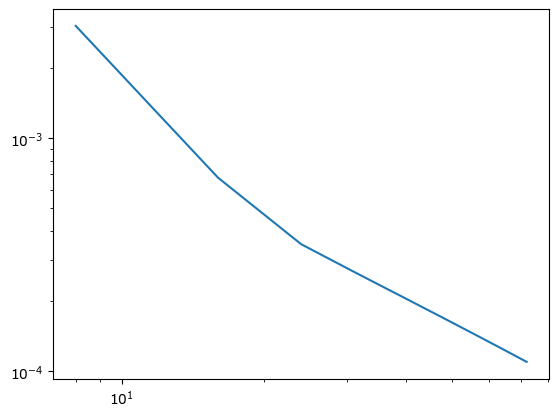

In [47]:
plt.loglog(mxs, mse)